In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import classification_report

In [11]:
# age: Age of the patient                                                         #In years
# sex: Sex of the patient (1 = male, 0= female;)                                  #1,0                               #
# chest pain type: Chest pain type =                                              #1,2,3,4
#                  Value 1: typical angina
#                  Value 2: atypical angina
#                  Value 3: non-anginal pain
#                  Value 4: asymptomatic
# resting bp s: Resting blood pressure (in mm Hg)                                 #in mm Hg
# cholestrol: cholesterol in mg/dl fetched via BMI sensor                         #in mg/dl
# fasting blood sugar: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)    #1,0 > 120 mg/dl
# resting ecg: resting electrocardiographic results                               #0,1,2
#              Value 0: normal
#              Value 1: having ST-T wave abnormality (T wave inversions and/or
#                                     ST elevation or depression of > 0.05 mV)
#              Value 2: showing probable or definite left ventricular hypertrophy
#                                                              by Estes' criteria
# max heart rate: maximum heart rate achieved.                                    #71-202
# exng: Exercise induced angina? (1 = yes; 0 = no)                                #0,1
# old peak: =ST
# ST slope: the slope of the peak exercise ST segment                             #0,1,2
#                       Value 0: upsloping
#                       Value 1: flat
#                       Value 2: downslopping
# target: 0 = less chance of heart attack; 1 = more chance of heart attack        #0,1

In [13]:
file_path = 'heart.csv'
heart_data = pd.read_csv(file_path)

In [15]:
width = 150
pd.set_option('display.width', width)
np.set_printoptions(linewidth=width)
pd.set_option('display.max_columns', 12)

In [19]:
heart_data_info = heart_data.info()
heart_data_head = heart_data.head()
print(heart_data_info)
print(heart_data_head)
print(heart_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB
None
   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  resting ecg  max heart rate  exercise angina  oldpeak  ST

In [21]:
duplicate_count = heart_data.duplicated().sum()

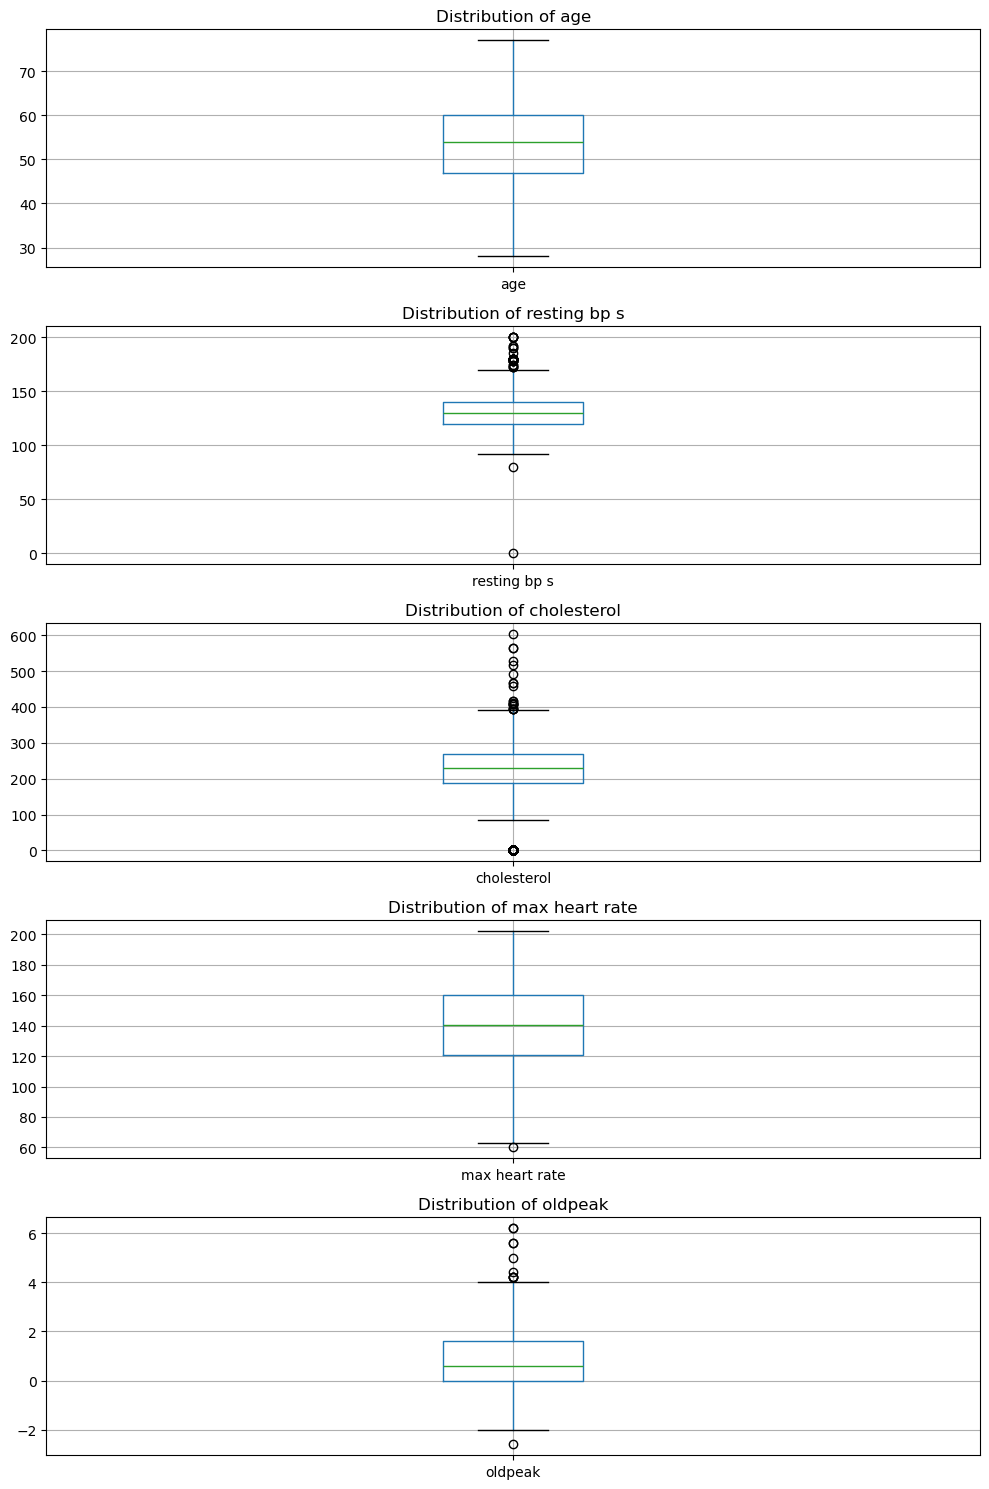

272
{'sex': array([1, 0], dtype=int64), 'chest pain type': array([2, 3, 4, 1], dtype=int64), 'fasting blood sugar': array([0, 1], dtype=int64), 'resting ecg': array([0, 1, 2], dtype=int64), 'exercise angina': array([0, 1], dtype=int64), 'ST slope': array([1, 2, 3, 0], dtype=int64), 'target': array([0, 1], dtype=int64)}


In [25]:
unique_values = {
    "sex": heart_data["sex"].unique(),
    "chest pain type": heart_data["chest pain type"].unique(),
    "fasting blood sugar": heart_data["fasting blood sugar"].unique(),
    "resting ecg": heart_data["resting ecg"].unique(),
    "exercise angina": heart_data["exercise angina"].unique(),
    "ST slope": heart_data["ST slope"].unique(),
    "target": heart_data["target"].unique()
}

numerical_cols = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
fig, ax = plt.subplots(len(numerical_cols), 1, figsize=(10, 15))

for i, col in enumerate(numerical_cols):
    heart_data.boxplot(column=[col], ax=ax[i])
    ax[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

print(duplicate_count)
print(unique_values)

In [33]:
heart_data['resting bp s'] = heart_data['resting bp s'].replace(0, heart_data['resting bp s'][heart_data['resting bp s'] > 0].median())
heart_data['cholesterol'] = heart_data['cholesterol'].replace(0, heart_data['cholesterol'][heart_data['cholesterol'] > 0].median())
heart_data['oldpeak'] = heart_data['oldpeak'].apply(lambda x: abs(x))

categorical_columns = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope', 'target']
for column in categorical_columns:
    heart_data[column] = heart_data[column].astype('category')

In [35]:
high_cholesterol = heart_data[heart_data['cholesterol'] >= 240]
count_high_cholesterol = high_cholesterol.shape[0]
print("Number of patients with cholesterol levels of 240 mg/dl or above:", count_high_cholesterol)

Number of patients with cholesterol levels of 240 mg/dl or above: 682


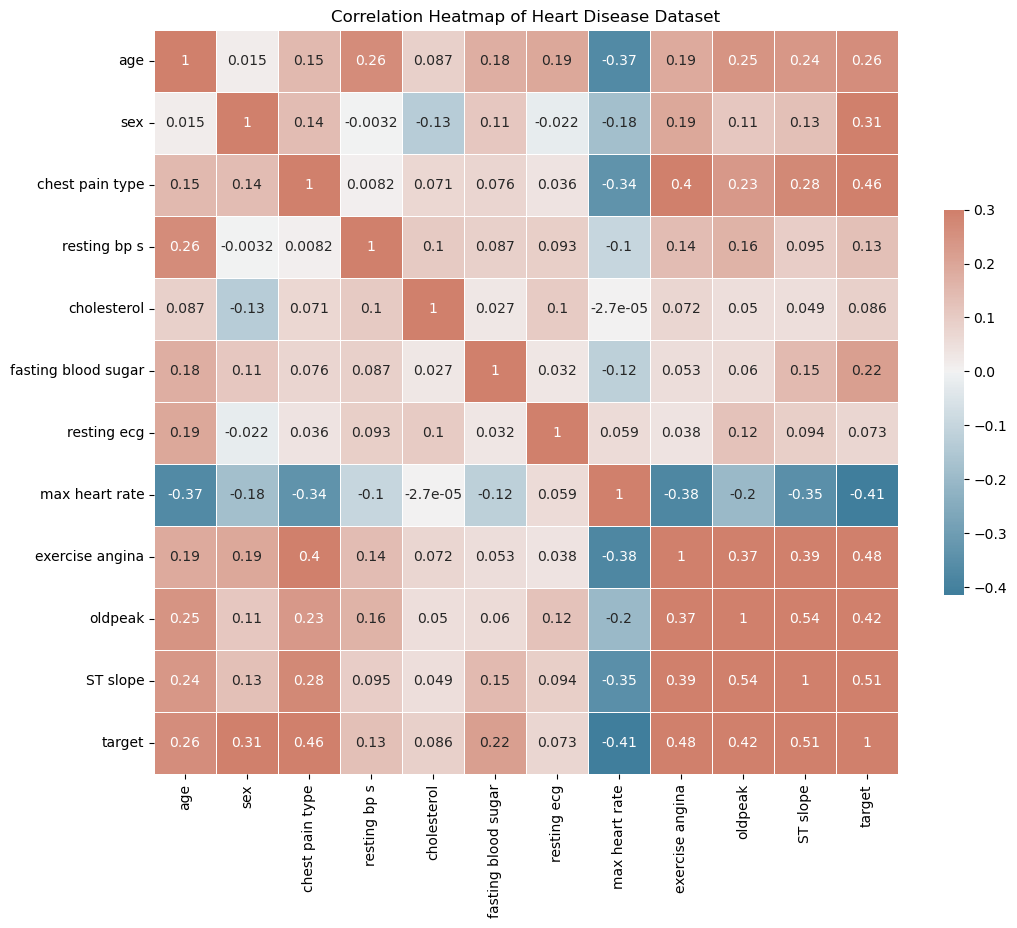

In [37]:
corr = heart_data.corr()
plt.figure(figsize=(12, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation Heatmap of Heart Disease Dataset')
plt.show()

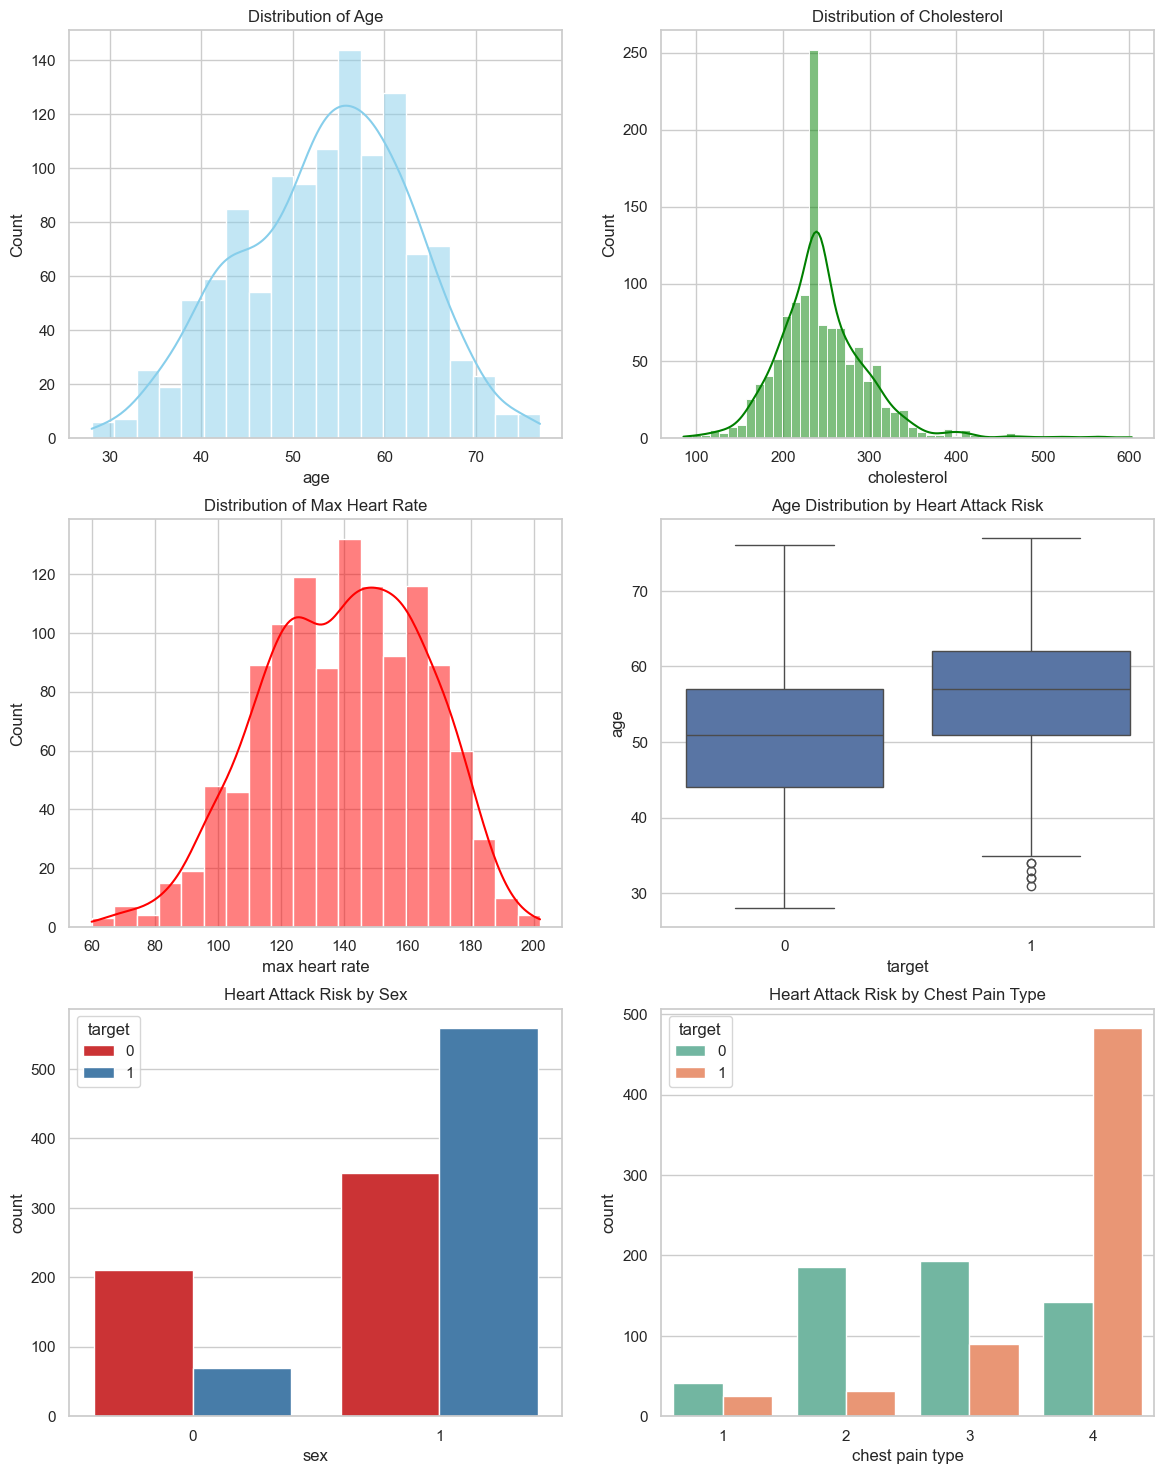

In [39]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

sns.histplot(data=heart_data, x='age', kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Age')

sns.histplot(data=heart_data, x='cholesterol', kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Distribution of Cholesterol')

sns.histplot(data=heart_data, x='max heart rate', kde=True, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Distribution of Max Heart Rate')

sns.boxplot(data=heart_data, x='target', y='age', ax=axes[1, 1])
axes[1, 1].set_title('Age Distribution by Heart Attack Risk')

sns.countplot(data=heart_data, x='sex', hue='target', ax=axes[2, 0], palette='Set1')
axes[2, 0].set_title('Heart Attack Risk by Sex')

sns.countplot(data=heart_data, x='chest pain type', hue='target', ax=axes[2, 1], palette='Set2')
axes[2, 1].set_title('Heart Attack Risk by Chest Pain Type')

plt.show()

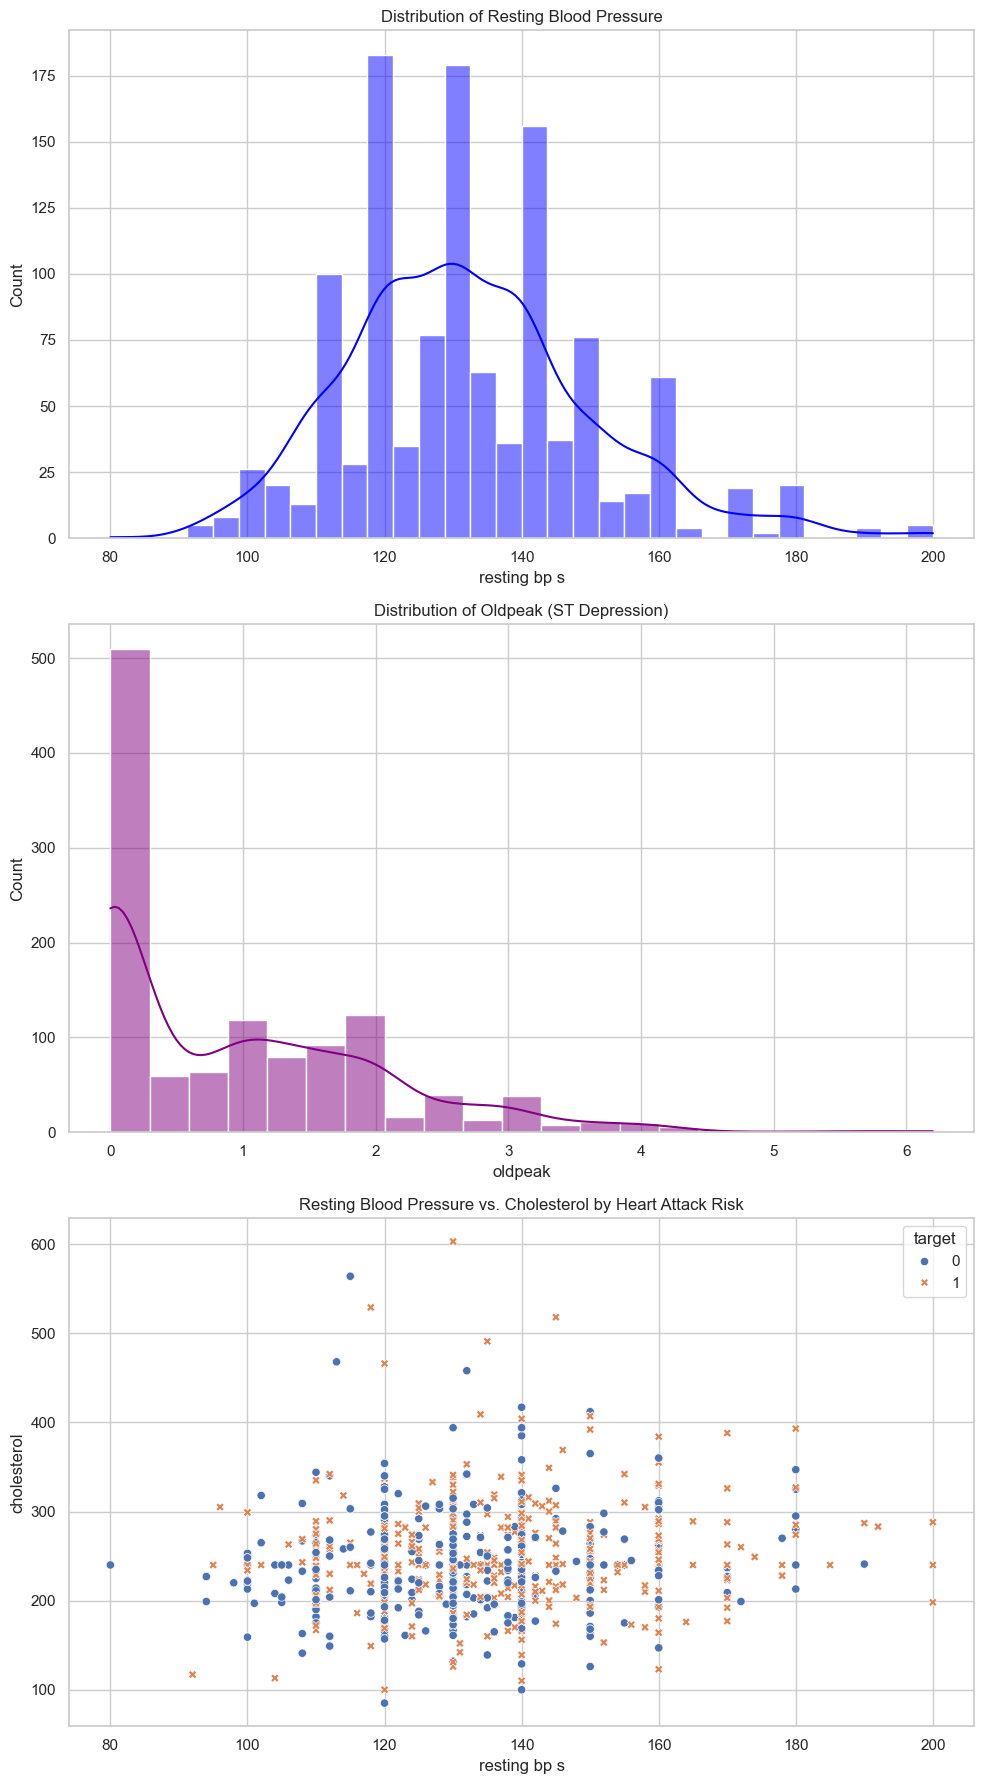

In [41]:
fig, axes = plt.subplots(3, 1, figsize=(10, 18))


sns.histplot(data=heart_data, x='resting bp s', kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Resting Blood Pressure')

sns.histplot(data=heart_data, x='oldpeak', kde=True, ax=axes[1], color='purple')
axes[1].set_title('Distribution of Oldpeak (ST Depression)')


sns.scatterplot(data=heart_data, x='resting bp s', y='cholesterol', hue='target', style='target', ax=axes[2])
axes[2].set_title('Resting Blood Pressure vs. Cholesterol by Heart Attack Risk')

plt.tight_layout()
plt.show()

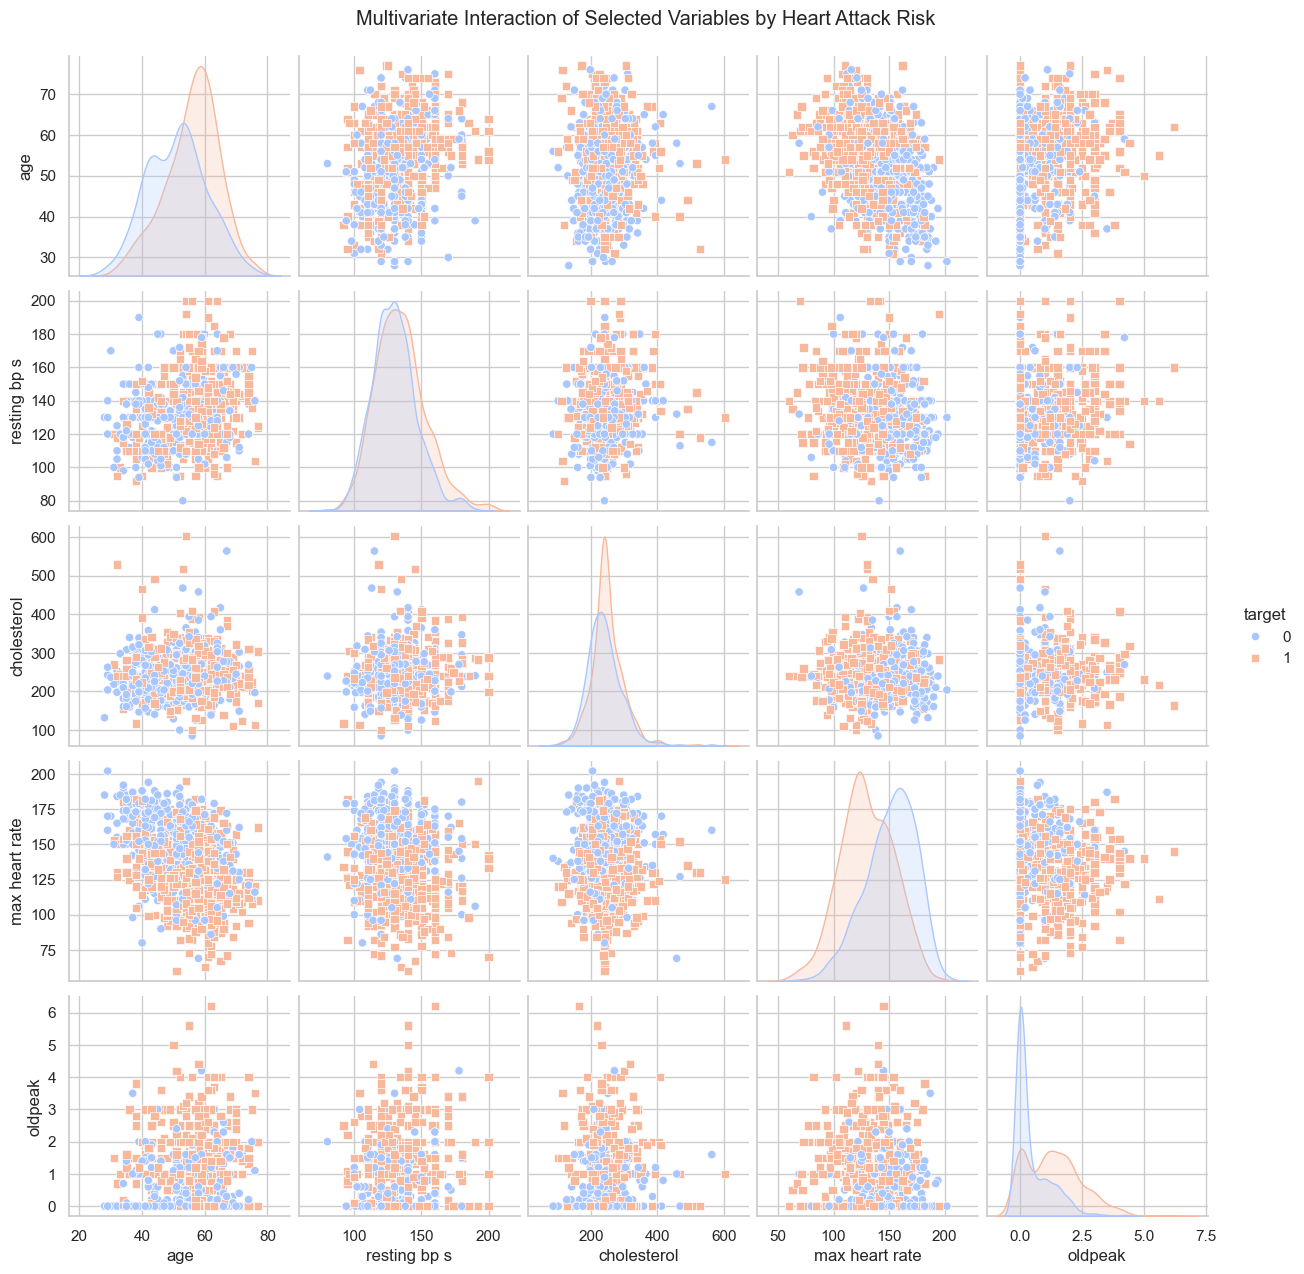

In [43]:
selected_columns = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak', 'target']
sns.pairplot(heart_data[selected_columns], hue='target', palette='coolwarm', markers=["o", "s"])
plt.suptitle('Multivariate Interaction of Selected Variables by Heart Attack Risk', y=1.02)
plt.show()

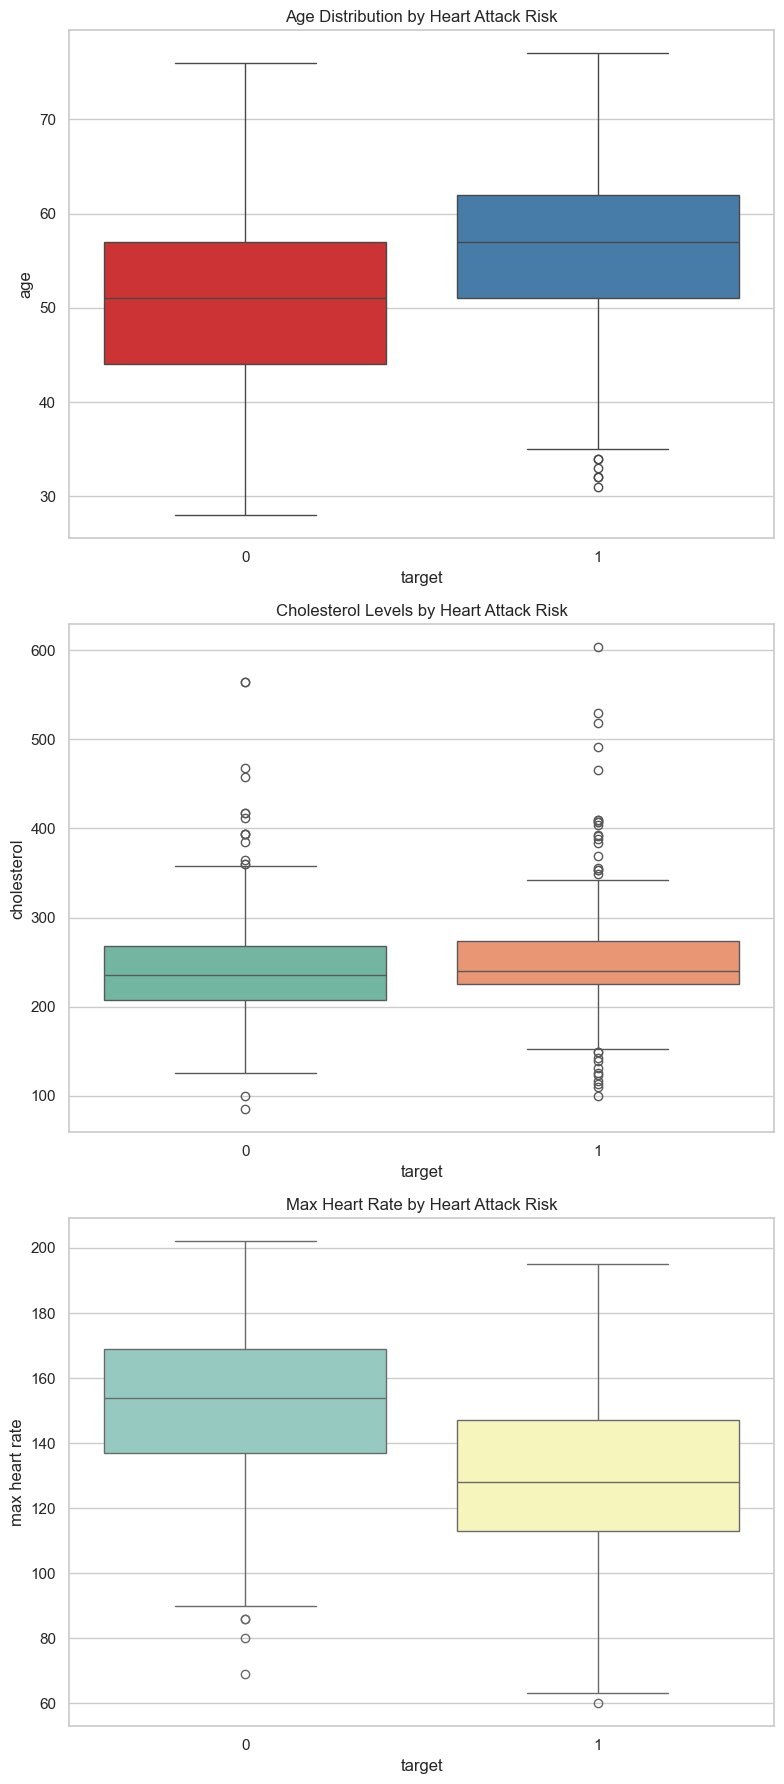

In [47]:
fig, axes = plt.subplots(3, 1, figsize=(8, 18))

sns.boxplot(data=heart_data, x='target', y='age', hue='target', ax=axes[0], palette='Set1', legend=False)
axes[0].set_title('Age Distribution by Heart Attack Risk')

sns.boxplot(data=heart_data, x='target', y='cholesterol', hue='target', ax=axes[1], palette='Set2', legend=False)
axes[1].set_title('Cholesterol Levels by Heart Attack Risk')

sns.boxplot(data=heart_data, x='target', y='max heart rate', hue='target', ax=axes[2], palette='Set3', legend=False)
axes[2].set_title('Max Heart Rate by Heart Attack Risk')

plt.tight_layout()
plt.show()

C:\Users\stepn\AppData\Local\Temp\ipykernel_23100\4166877308.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = heart_data.groupby('target')[['cholesterol', 'age', 'resting bp s', 'max heart rate']].mean()


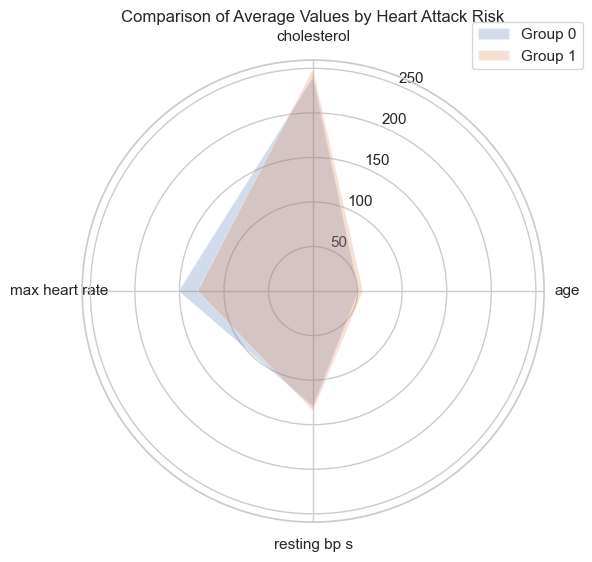

In [55]:
grouped_data = heart_data.groupby('target')[['cholesterol', 'age', 'resting bp s', 'max heart rate']].mean()
labels = grouped_data.columns
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]
values = grouped_data.values

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
for i in range(len(grouped_data)):
    data = list(values[i]) + [values[i][0]]
    ax.fill(angles, data, alpha=0.25, label=f'Group {grouped_data.index[i]}')

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.title('Comparison of Average Values by Heart Attack Risk')
plt.show()

In [57]:
X = heart_data.drop('target', axis=1)
y = heart_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']])
X_test_scaled = scaler.transform(X_test[['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']])

for i, col in enumerate(['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']):
    X_train[col] = X_train_scaled[:, i]
    X_test[col] = X_test_scaled[:, i]

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
class_report = classification_report(y_test, y_pred, target_names=["Less Risk", "More Risk"])
print("\nClassification Report:")
print(class_report)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.3f}")

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

Accuracy: 85.71%

Confusion Matrix:
[[ 89  18]
 [ 16 115]]

Classification Report:
              precision    recall  f1-score   support

   Less Risk       0.85      0.83      0.84       107
   More Risk       0.86      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.85      0.86       238
weighted avg       0.86      0.86      0.86       238

ROC-AUC Score: 0.914


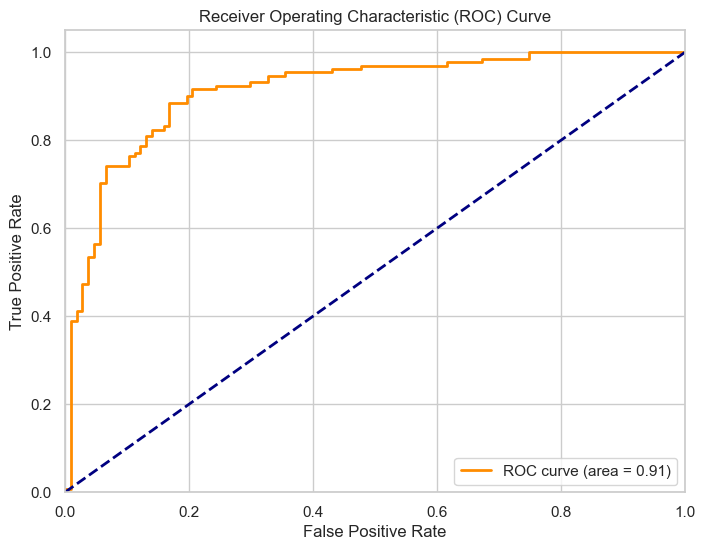

In [59]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()